In [40]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['figure.dpi'] = 120
import cv2 as cv
import matplotlib.image as mpimg
from scipy.spatial import Voronoi, voronoi_plot_2d

In [28]:
imgs_path = r"..\data\Ki67\SHIDC-B-Ki-67\Train"

In [29]:
color = {
        1:"brown",
        2:"blue",
        3:"green",
        4:"red"
}

In [30]:
def plot_comprasion(img_name):
    img_path= os.path.join(imgs_path,img_name)
    fig, axs = plt.subplots(1,3)
    #open img
    img_orginal = plt.imread(img_path+".jpg")
    axs[0].imshow(img_orginal)
    #load df
    df = pd.read_json(img_path+".json")
    points = list(zip(df.x,df.y,df.label_id))
    axs[1].imshow(img_orginal)
    for point in points:
        x = point[0]
        y = point[1]
        label = point[2]
        axs[1].plot(x, y, marker='*', color=color[label])
    #sift keypoitns
    
    sift = cv.SIFT_create()
    img = mpimg.imread(img_path+".jpg")
    keypoints, desc = sift.detectAndCompute(img,None)
    img_cv=cv.drawKeypoints(img,keypoints,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    axs[2].imshow(img_cv)

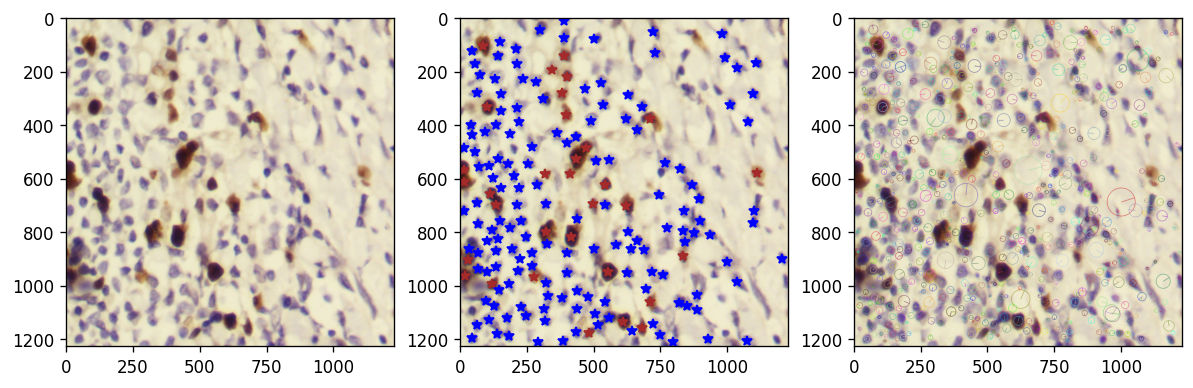

In [31]:
plot_comprasion("p1_0299_6")

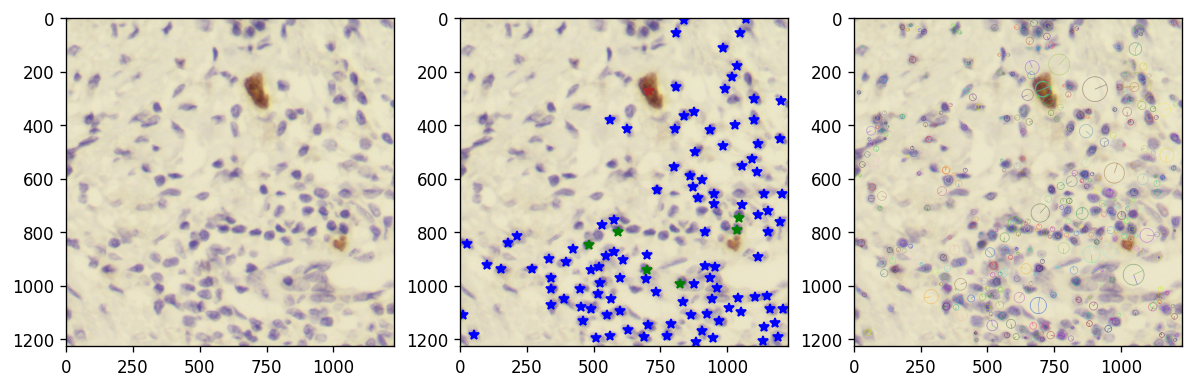

In [32]:
plot_comprasion("p1_0309_7")

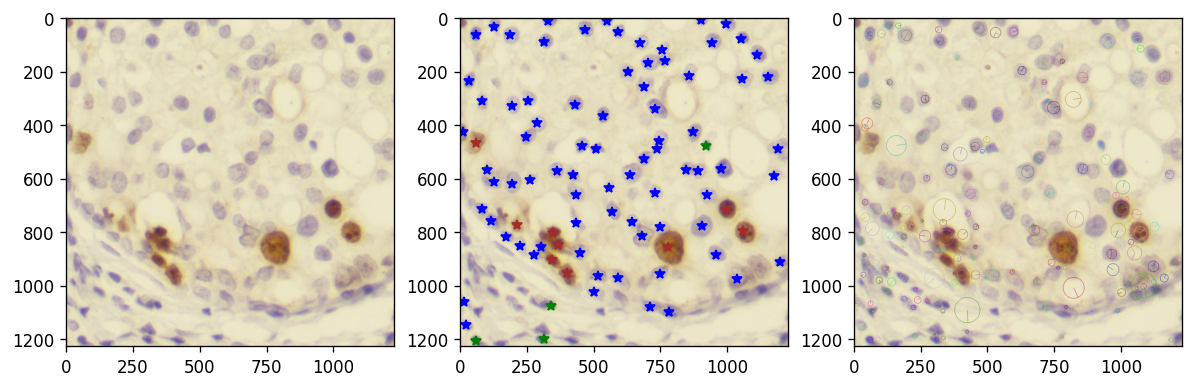

In [33]:
plot_comprasion("p1_0312_7")

# Voronois

In [35]:
import sys; sys.path.append('../')
from src.utils.visualize import plot_voronoi

In [48]:
def voronoi_plot(img_name):
    img_path= os.path.join(imgs_path,img_name)
    img_orginal = plt.imread(img_path+".jpg")
    df = pd.read_json(img_path+".json")
    keys = list(zip(df.x,df.y))
    vor = Voronoi(keys)
    plot_voronoi(vor,img_orginal,show_points=True,show_verticles=False,line_width=0.8,points_size=20)

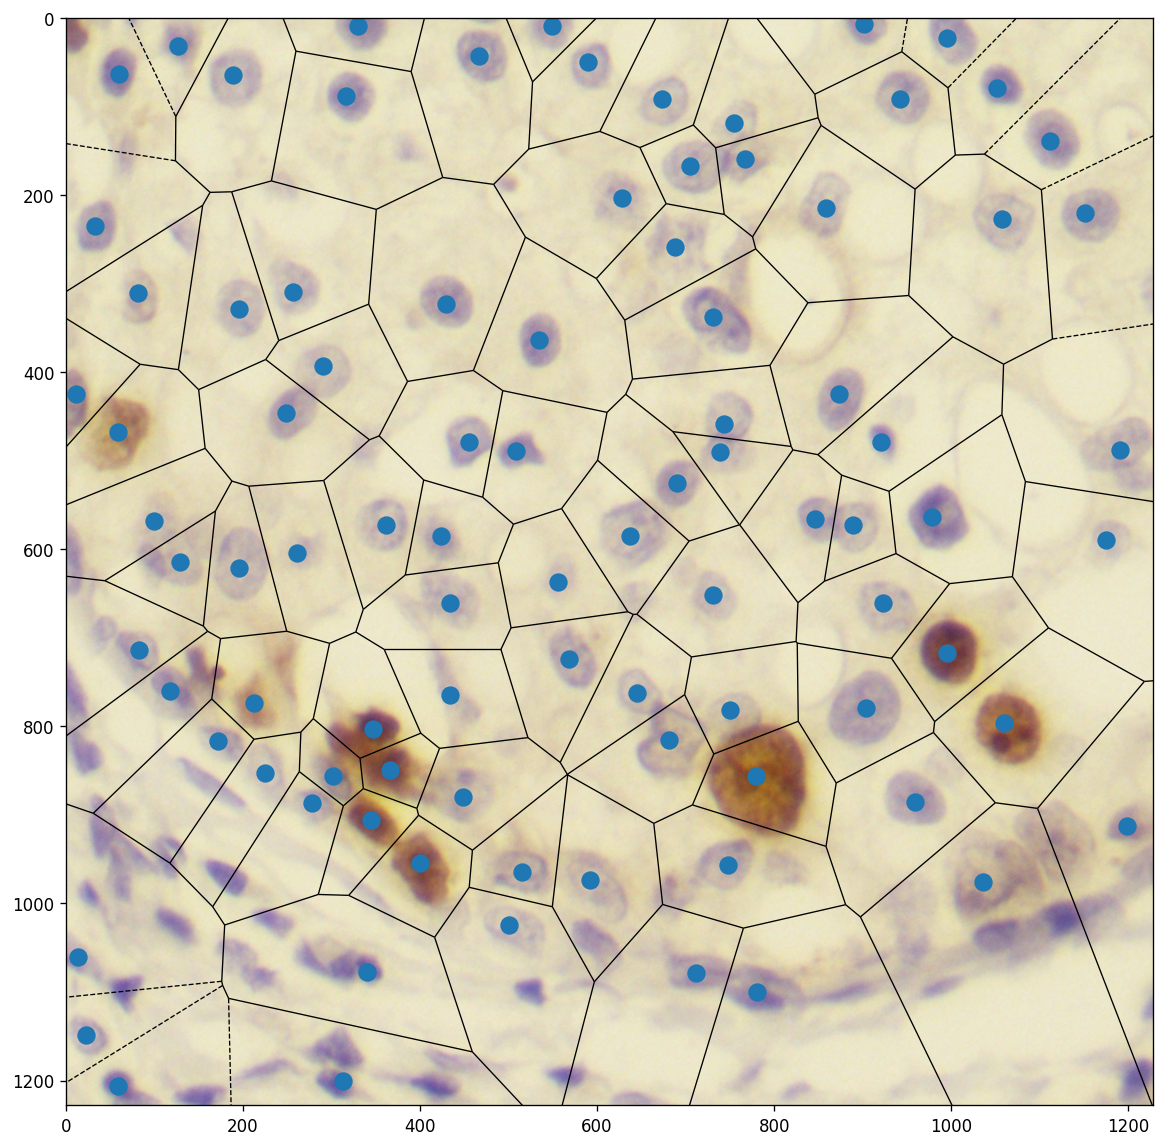

In [49]:
voronoi_plot("p1_0312_7")

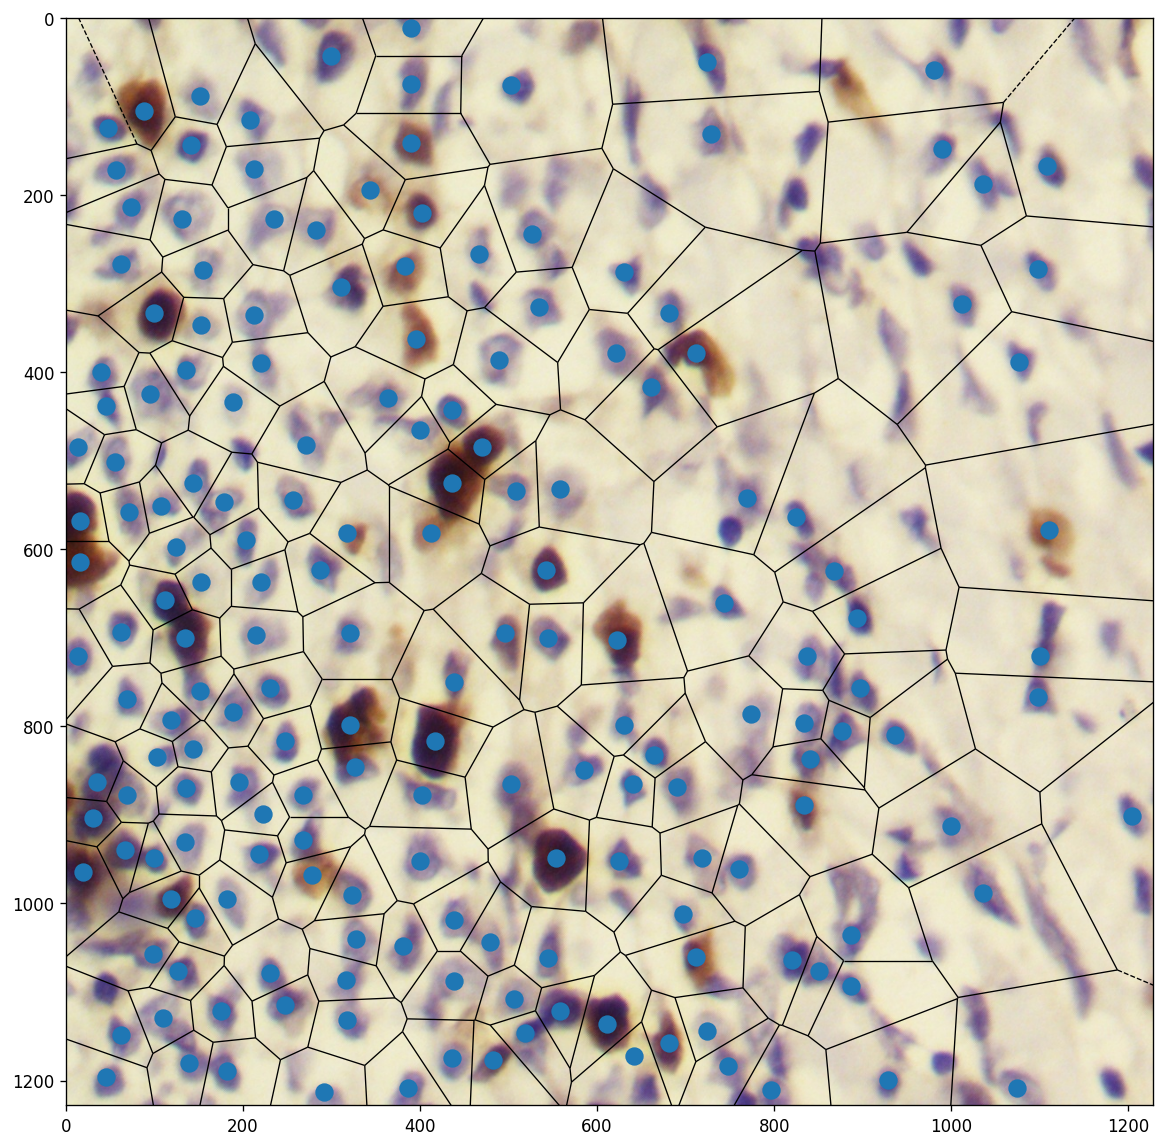

In [50]:
voronoi_plot("p1_0299_6")

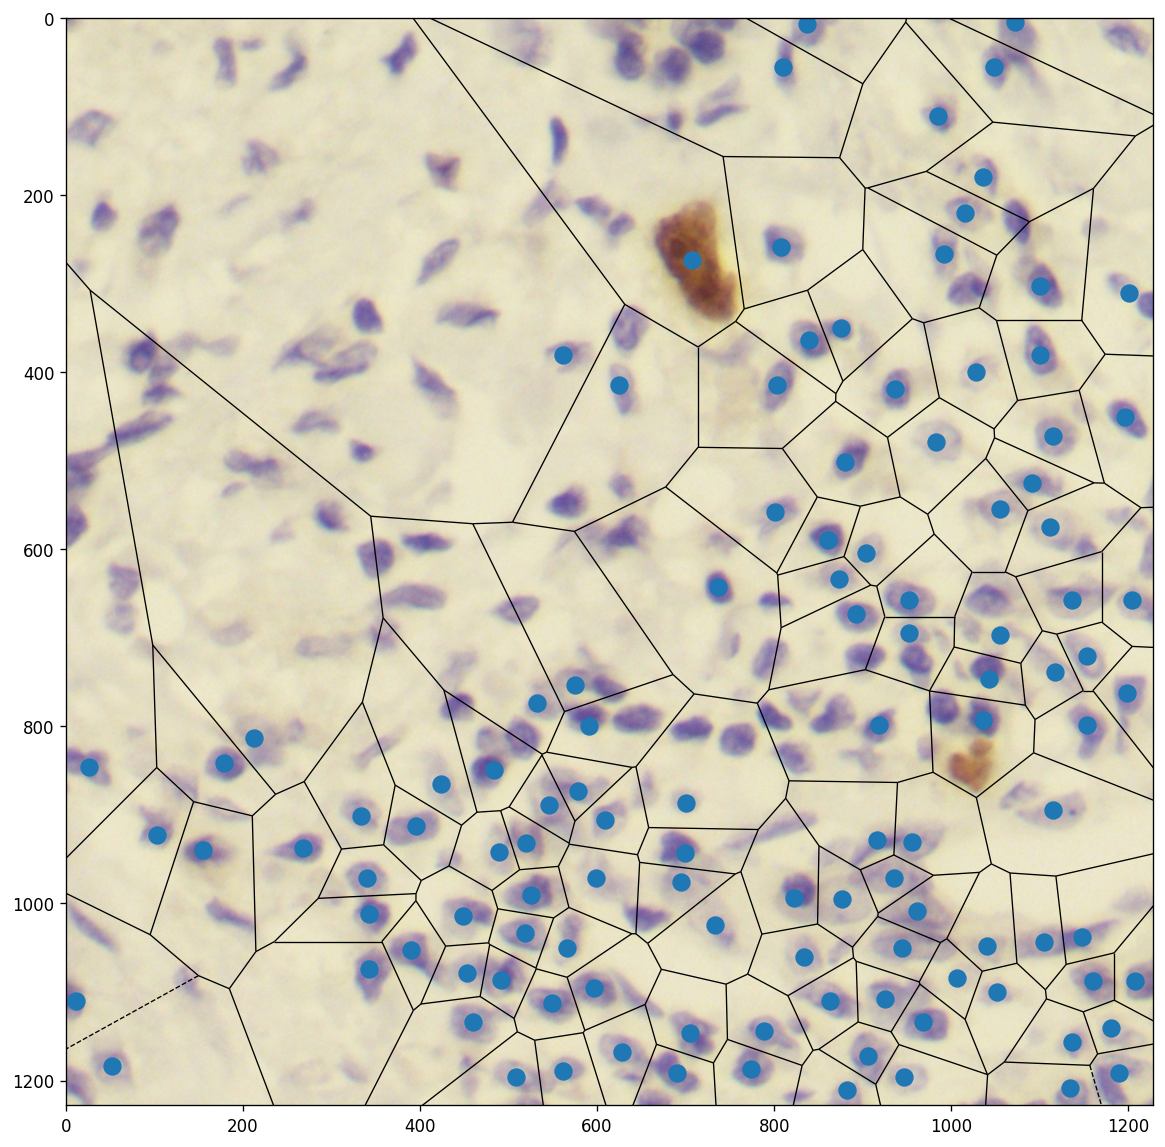

In [51]:
voronoi_plot("p1_0309_7")